In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
tips = pd.read_excel("tips.xlsx")

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [20]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### Numerical summary for 'tips' 

In [8]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Boxplot for 'tips'


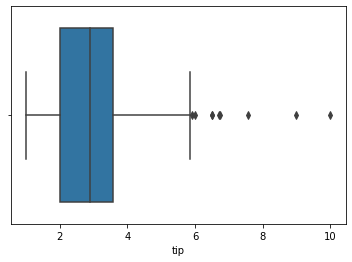

In [7]:
sns.boxplot(x=tips['tip'])
plt.show()

#### Boxplot for 'total_bill'

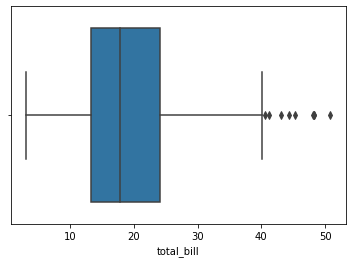

In [9]:
sns.boxplot(x=tips['total_bill'])
plt.show()

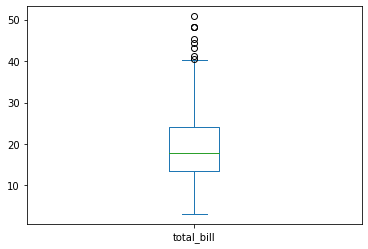

In [25]:
tips.total_bill.plot.box()
plt.show()

#### what is the percent of females in the data? 


In [26]:
tips.sex.value_counts(normalize = True)

Male                   0.640816
Female                 0.355102
0.35655737704918034    0.004082
Name: sex, dtype: float64

#### Their are 35.65% Females

#### Bar plot with the bars representing the percentage of records for each gender.

In [11]:
freqs = tips.sex.value_counts(normalize = True )
print(freqs)

Male                   0.640816
Female                 0.355102
0.35655737704918034    0.004082
Name: sex, dtype: float64


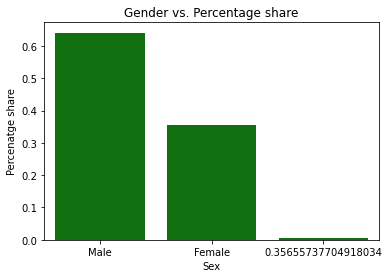

In [12]:
sns.barplot(x = freqs.index ,y=freqs.values ,color="green")
plt.ylabel("Percenatge share")
plt.xlabel("Sex")
plt.title("Gender vs. Percentage share")
plt.show()

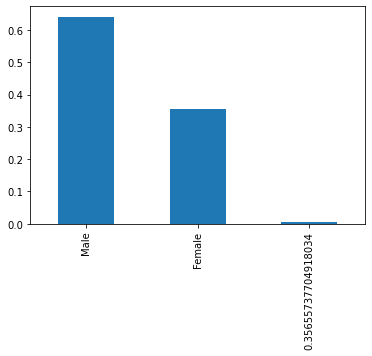

In [41]:
tips.sex.value_counts(normalize=True).plot.bar()
plt.show()

#### Does the average tip differ by gender? Does one gender tip more than the other?

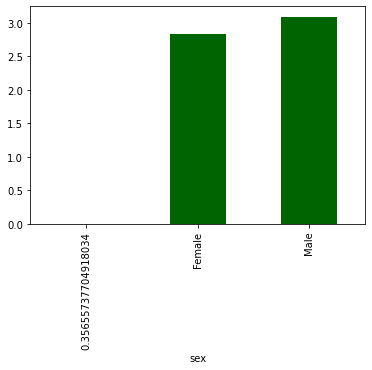

In [30]:
tips.groupby(['sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes, the average tip slightly differs by gender. Male tip slightly more than female


#### Does the average tip differ by the time of day?


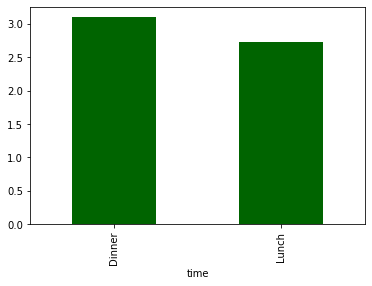

In [31]:
tips.groupby(['time'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes,people give more tip during Dinner compared to Lunch


#### Does the average tip differ by size (number of people at the table)? 


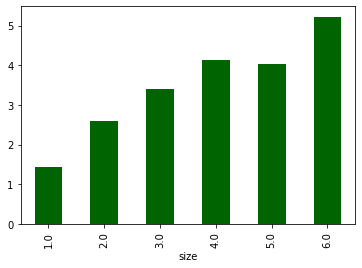

In [32]:
tips.groupby(['size'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes, more the number of people, higher the tip.

####  Do smokers tip more than non-smokers?


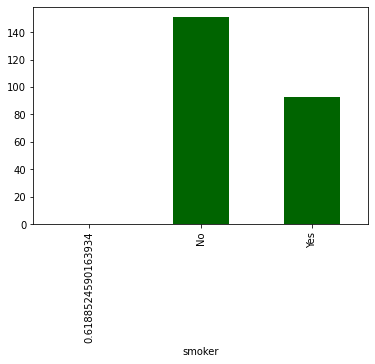

In [33]:
tips.groupby(['smoker'])['tip'].count().plot.bar(color="darkgreen")
plt.show()

#### No, smokers tip less than non-smoker

#### Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?


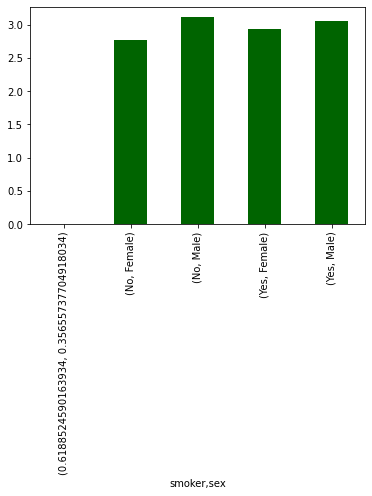

In [34]:
tips.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

In [35]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()


sex,0.35655737704918034,Female,Male
smoker,,,
0.6188524590163934,NaN,NaN,NaN
No,NaN,2.773519,3.113402
Yes,NaN,2.931515,3.051167


In [36]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [37]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip',aggfunc=np.median)

smoker,No,Yes
sex,,
Female,2.68,2.88
Male,2.74,3.00


#### 20th qunatile

In [38]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip',aggfunc= lambda x:np.quantile(x,0.2))

smoker,No,Yes
sex,,
Female,1.752,2.0
Male,2.000,2.0


#### The group with Male and Non-smoker tips the most. Also group with Male and smoker tips slightly less than group with Male non-smoker

#### Creating a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [16]:
tips.insert(2,"pct_tip",tips.tip/tips.total_bill)

In [17]:
tips.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2.0
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3.0
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3.0
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2.0
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4.0


#### Does pct_tip differ by gender? Does one gender tip more than the other?


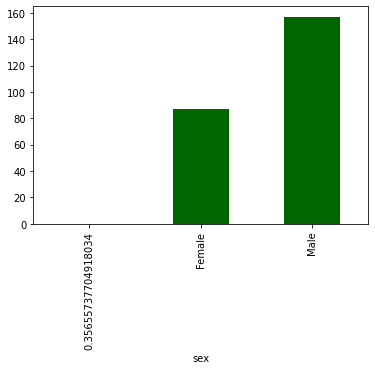

In [41]:
tips.groupby(['sex'])['pct_tip'].count().plot.bar(color="darkgreen")
plt.show()

In [42]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='pct_tip')

smoker,No,Yes
sex,,
Female,0.156921,0.182150
Male,0.160669,0.152771


#### Yes, the pct_tip differs by gender. Male tip more than female.

#### Does pct_tip differ by size (number of people at the table)? 


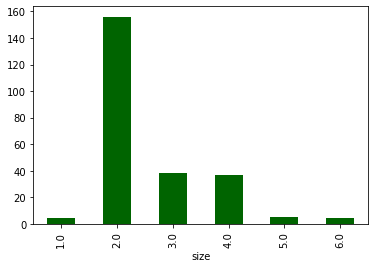

In [43]:
tips.groupby(['size'])['pct_tip'].count().plot.bar(color="darkgreen")
plt.show()

#### Yes, pct_tip do differ by size. The table with size 2 gives maximum pct_tip

#### Make the gender vs. smoker view using pct_tip  - does your inference change?


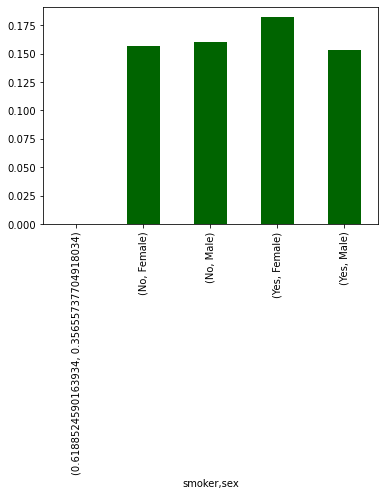

In [44]:
tips.groupby(['smoker','sex'])['pct_tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes, group with Female smoker gives more average pct_tip

#### Scatter plot of total_bill vs. tip.


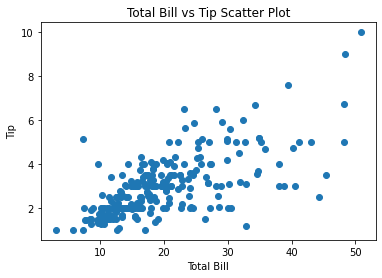

In [45]:
plt.scatter(x='total_bill', y='tip', data = tips)
plt.xlabel('Total Bill')              # label = name of label
plt.ylabel('Tip')
plt.title('Total Bill vs Tip Scatter Plot')            # title = title of plot
plt.show()

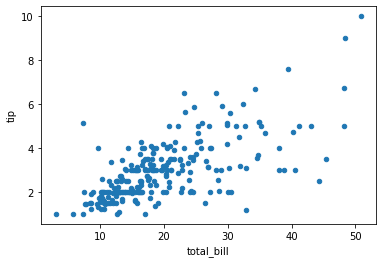

In [13]:
tips.plot.scatter(x='total_bill', y='tip')
plt.show()

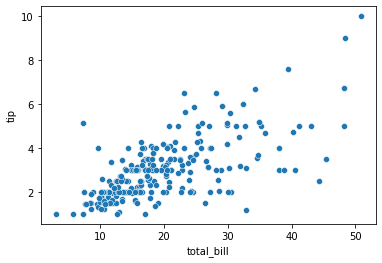

In [14]:
sns.scatterplot(x='total_bill', y='tip', data = tips)
plt.show()

#### Thus, higher the amount of bill, higher the tip

#### Scatter plot of total_bill vs. pct_tip.


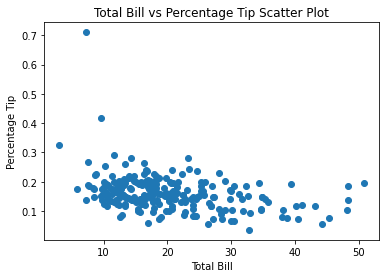

In [48]:
plt.scatter(x='total_bill', y='pct_tip', data = tips)
plt.xlabel('Total Bill')              # label = name of label
plt.ylabel('Percentage Tip')
plt.title('Total Bill vs Percentage Tip Scatter Plot')            # title = title of plot
plt.show()

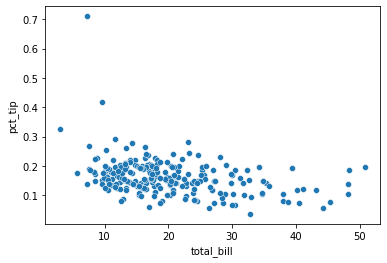

In [18]:
sns.scatterplot(x='total_bill', y='pct_tip', data = tips)
plt.show()

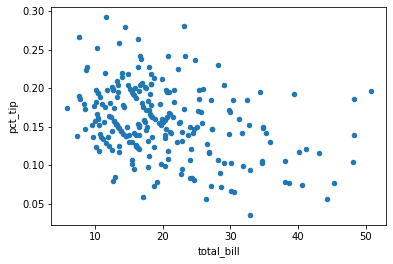

In [19]:
tips[tips.pct_tip<=0.3].plot.scatter(x='total_bill', y='pct_tip')
plt.show()

#### Thus, higher the amount of bill doesn't make much difference to pct_bill